Autor: Duver Ivan Lectamo

02_Red_Neuronal_MLPRegressor_Sklearn

C4 Nivel innovador

Importamos librerias

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import keras
import pandas as pd
import matplotlib.pyplot as plt

Cargamos el conjunto de datos

In [ ]:
housing = fetch_california_housing()
X, y = housing.data, housing.target

Exploramos los datos

In [ ]:
type(housing)
housing.keys()
housing['data']
housing['target']
housing['target_names']
housing['DESCR']
housing['feature_names']

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

Dividir os datos en conjuntos de entrenamienot y prueba

In [ ]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

In [ ]:
print('X_train:', X_train.shape)
print('X_test:', X_test.shape)
print('X_valid:', X_valid.shape)
print('y_train:', y_train.shape)
print('y_test:', y_test.shape)
print('y_valid:', y_valid.shape)

X_train: (11610, 8)
X_test: (5160, 8)
X_valid: (3870, 8)
y_train: (11610,)
y_test: (5160,)
y_valid: (3870,)


In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Escalar el modelo

In [ ]:
scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)

# Crear y entrenar el modelo

In [ ]:
model = keras.models.Sequential([keras.layers.Dense(30,
                                                   activation='relu',
                                                   input_shape=X_train.shape[1:]),
                                 keras.layers.Dense(1)])

#model = MLPRegressor(hidden_layer_sizes=(100,),
#                     activation='relu',
#                     solver='adam',
#                     max_iter=100,
#                     random_state=42, verbose=True)
# model.fit(X_train_scaled, y_train)



Compilamos el modelo

In [ ]:
model.compile(loss='mean_squared_error',
              optimizer='sgd',
              metrics=[keras.metrics.RootMeanSquaredError(),
                       'mean_absolute_percentage_error'])

In [27]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
363/363 [==============================] - 4s 6ms/step - loss: 1.2931 - root_mean_squared_error: 1.1371 - mean_absolute_percentage_error: 40.6828 - val_loss: 0.6087 - val_root_mean_squared_error: 0.7802 - val_mean_absolute_percentage_error: 33.7533
Epoch 2/10
363/363 [==============================] - 1s 4ms/step - loss: 0.5382 - root_mean_squared_error: 0.7336 - mean_absolute_percentage_error: 31.0996 - val_loss: 0.4893 - val_root_mean_squared_error: 0.6995 - val_mean_absolute_percentage_error: 30.3313
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4654 - root_mean_squared_error: 0.6822 - mean_absolute_percentage_error: 28.2996 - val_loss: 0.4515 - val_root_mean_squared_error: 0.6719 - val_mean_absolute_percentage_error: 28.3009
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4379 - root_mean_squared_error: 0.6618 - mean_absolute_percentage_error: 27.1358 - val_loss: 0.4394 - val_root_mean_squared_error: 0.6629 - val_

Graficar el historial de entrenamiento

<Axes: >

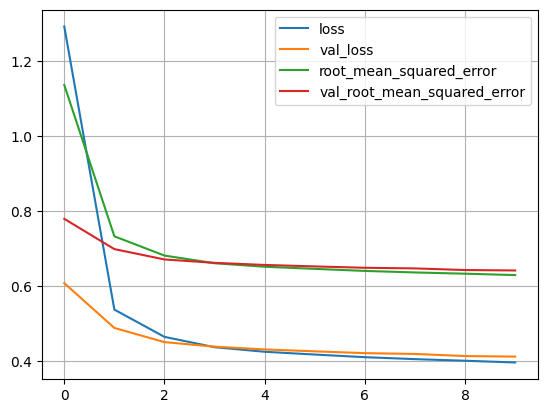

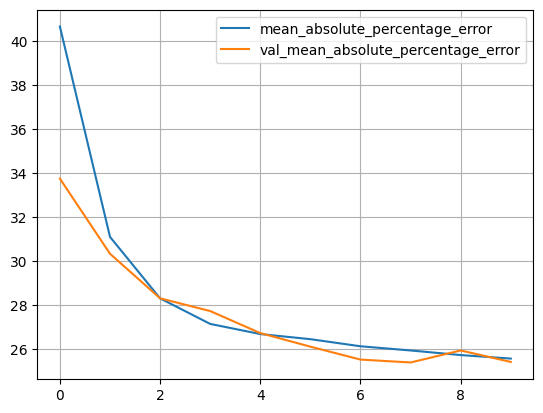

In [30]:
dfHistory = pd.DataFrame(history.history)
dfHistory[['loss', 'val_loss', 'root_mean_squared_error', 'val_root_mean_squared_error']].plot(grid=True)
dfHistory[['mean_absolute_percentage_error', 'val_mean_absolute_percentage_error']].plot(grid=True)

# Hacer predicciones y calcular el error

In [36]:
# y_pred = model.predict(X_test_scaled)
# mse = mean_squared_error(y_test, y_pred)
# print(f'Mean Squared Error: {mse}')
loss, RMSE, MAPE = model.evaluate(X_train, y_train)
print('Evaluar el modelo en el conjunto de datos de entrenamiento')
print('Loss train:', loss)
print('root_mean_squared_error train:', RMSE)
print('mean_absolute_percentage_error train:', MAPE)

363/363 [==============================] - 1s 4ms/step - loss: 0.3933 - root_mean_squared_error: 0.6271 - mean_absolute_percentage_error: 25.2641
Evaluar el modelo en el conjunto de datos de entrenamiento
Loss train: 0.3933154344558716
root_mean_squared_error train: 0.6271486282348633
mean_absolute_percentage_error train: 25.264053344726562


In [37]:
loss, RMSE, MAPE = model.evaluate(X_valid, y_valid)
print('Evaluar el modelo en el conjunto de datos de validacion')
print('Loss train:', loss)
print('root_mean_squared_error train:', RMSE)
print('mean_absolute_percentage_error train:', MAPE)

121/121 [==============================] - 0s 1ms/step - loss: 0.4128 - root_mean_squared_error: 0.6425 - mean_absolute_percentage_error: 25.4031
Evaluar el modelo en el conjunto de datos de validacion
Loss train: 0.41283372044563293
root_mean_squared_error train: 0.6425213813781738
mean_absolute_percentage_error train: 25.40309715270996


In [38]:
loss, RMSE, MAPE = model.evaluate(X_test, y_test)
print('Evaluar el modelo en el conjunto de datos de validacion')
print('Loss train:', loss)
print('root_mean_squared_error train:', RMSE)
print('mean_absolute_percentage_error train:', MAPE)

162/162 [==============================] - 0s 2ms/step - loss: 0.4061 - root_mean_squared_error: 0.6373 - mean_absolute_percentage_error: 25.8298
Evaluar el modelo en el conjunto de datos de validacion
Loss train: 0.40613701939582825
root_mean_squared_error train: 0.6372888088226318
mean_absolute_percentage_error train: 25.829811096191406
